# Setting

In [1]:
import pandas as pd
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Set

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = '/content/gdrive/MyDrive/UNIST/계량 경제학/march_cps.csv'
data = pd.read_csv(path)
data = data.drop(columns=['Unnamed: 0'])

In [7]:
data.head()

,year,age,female,wkswork1,uhrswork,college_grad,race4,marital_status,veteran,weekly_earn,hourly_wage
0,1976,27,0,52,40,0,1,1,1,211.538467,5.288462
1,1976,28,0,52,40,1,1,1,0,201.923080,5.048077
2,1976,46,0,43,68,0,1,1,1,324.325592,4.769494
3,1976,26,0,52,35,1,2,1,0,206.730774,5.906593
4,1976,49,0,52,40,0,1,2,1,92.307693,2.307692


In [8]:
data.tail()

,year,age,female,wkswork1,uhrswork,college_grad,race4,marital_status,veteran,weekly_earn,hourly_wage
870820,2010,47,1,40,40,1,3,1,0,450.000000,11.250000
870821,2010,46,1,52,35,1,3,2,0,1153.846191,32.967033
870822,2010,38,1,52,36,1,3,1,0,1000.000000,27.777779
870823,2010,39,1,52,35,1,3,1,0,442.307678,12.637362
870824,2010,38,1,52,50,1,1,1,0,884.615356,17.692307


# EDA

## Female

### 모든 데이터

<Axes: xlabel='female', ylabel='weekly_earn'>

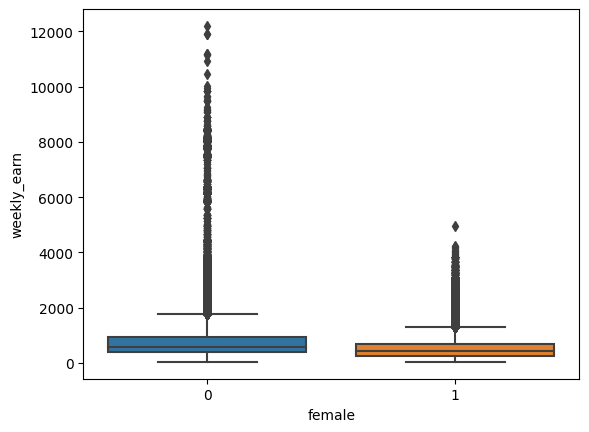

In [11]:
sns.boxplot(data=data, 
            x='female',
            y='weekly_earn')

<Axes: xlabel='female', ylabel='hourly_wage'>

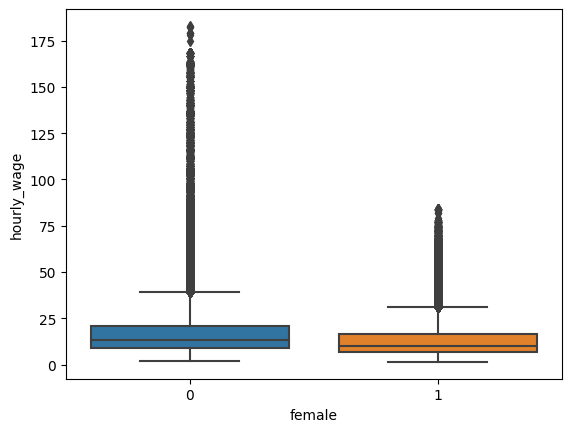

In [13]:
sns.boxplot(data=data, 
            x='female',
            y='hourly_wage')

### 연도별 남녀에 따른 평균 임금

In [45]:
mean_female_data = data.groupby(['year', 'female'])\
                .mean()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

mean_female_data.columns = ['year', 'female', 'mean_weekly_earn', 'mean_hourly_wage']
mean_female_data.head()

,year,female,mean_weekly_earn,mean_hourly_wage
0,1976,0,286.483849,6.563769
1,1976,1,161.353040,4.035686
2,1977,0,302.620445,6.888721
3,1977,1,172.832052,4.305925
4,1978,0,325.176593,7.387755


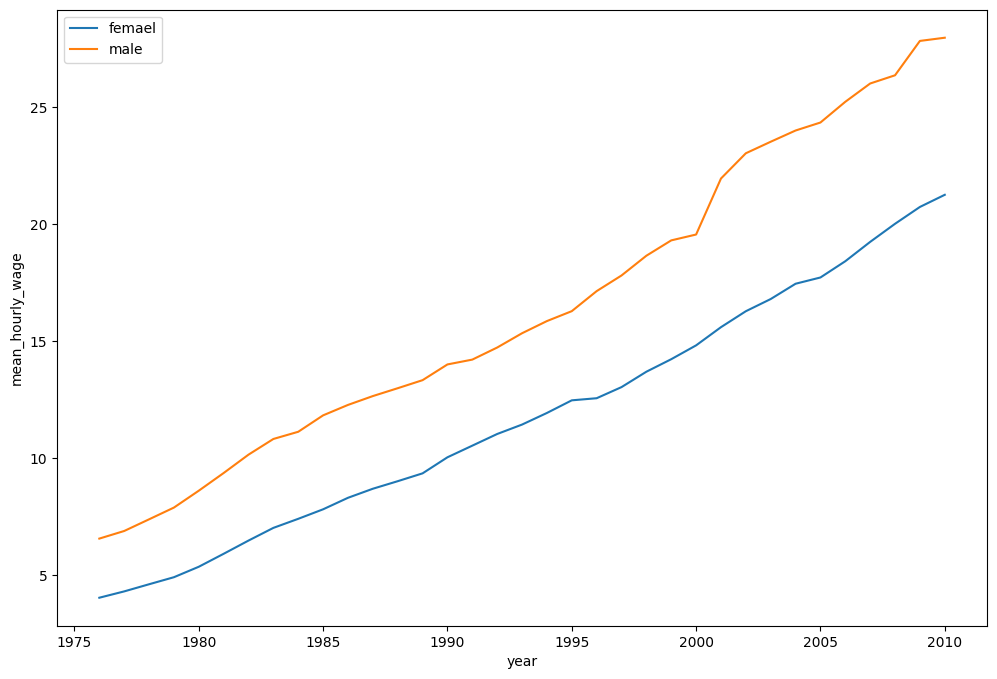

In [65]:
plt.figure(figsize=(12,8))
sns.lineplot(data=mean_female_data.loc[(mean_female_data['female']==1)],
             x=mean_female_data.loc[(mean_female_data['female']==1)]['year'],
             y='mean_hourly_wage',
             label='femael')
sns.lineplot(data=mean_female_data.loc[(mean_female_data['female']==0)],
             x=mean_female_data.loc[(mean_female_data['female']==0)]['year'],
             y='mean_hourly_wage',
             label='male')
plt.legend()
plt.show()

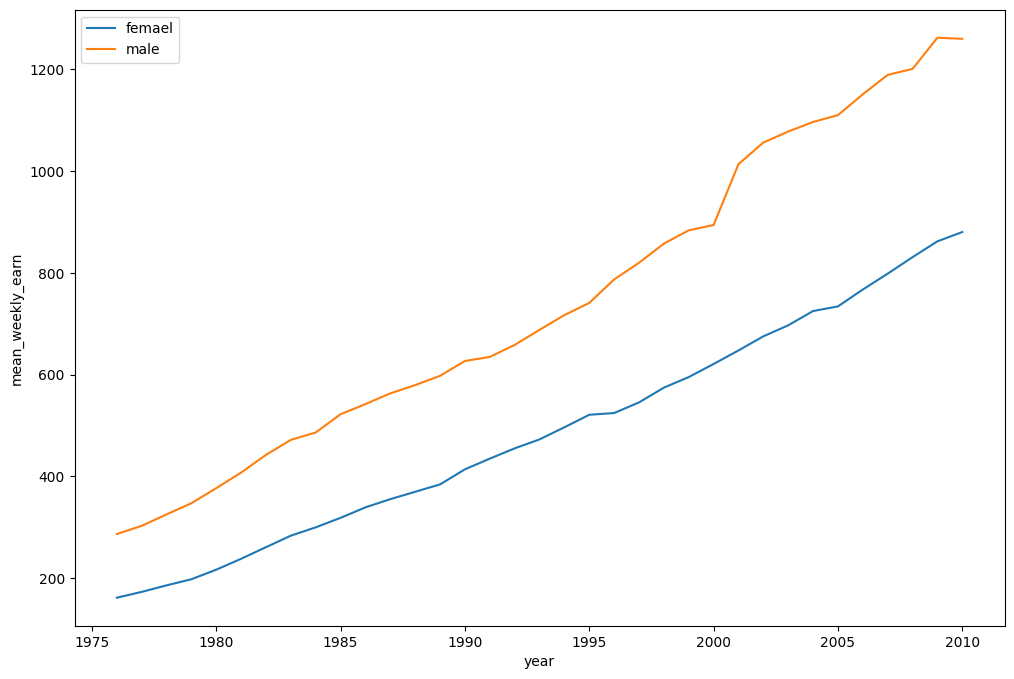

In [66]:
plt.figure(figsize=(12,8))
sns.lineplot(data=mean_female_data.loc[(mean_female_data['female']==1)],
             x=mean_female_data.loc[(mean_female_data['female']==1)]['year'],
             y='mean_weekly_earn',
             label='femael')
sns.lineplot(data=mean_female_data.loc[(mean_female_data['female']==0)],
             x=mean_female_data.loc[(mean_female_data['female']==0)]['year'],
             y='mean_weekly_earn',
             label='male')
plt.legend()
plt.show()

### 연도별 남녀에 따른 최고 임금

In [103]:
plt.figure(figsize=(12,8))
max_female_data = data.groupby(['year', 'female'])\
                .max()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

max_female_data.columns = ['year', 'female', 'max_weekly_earn', 'max_hourly_wage']
max_female_data.head()

,year,female,max_weekly_earn,max_hourly_wage
0,1976,0,1083.386353,19.230768
1,1976,1,714.285706,10.000000
2,1977,0,1111.111084,19.230770
3,1977,1,538.461548,10.989011
4,1978,0,1250.000000,20.796154


<Figure size 1200x800 with 0 Axes>

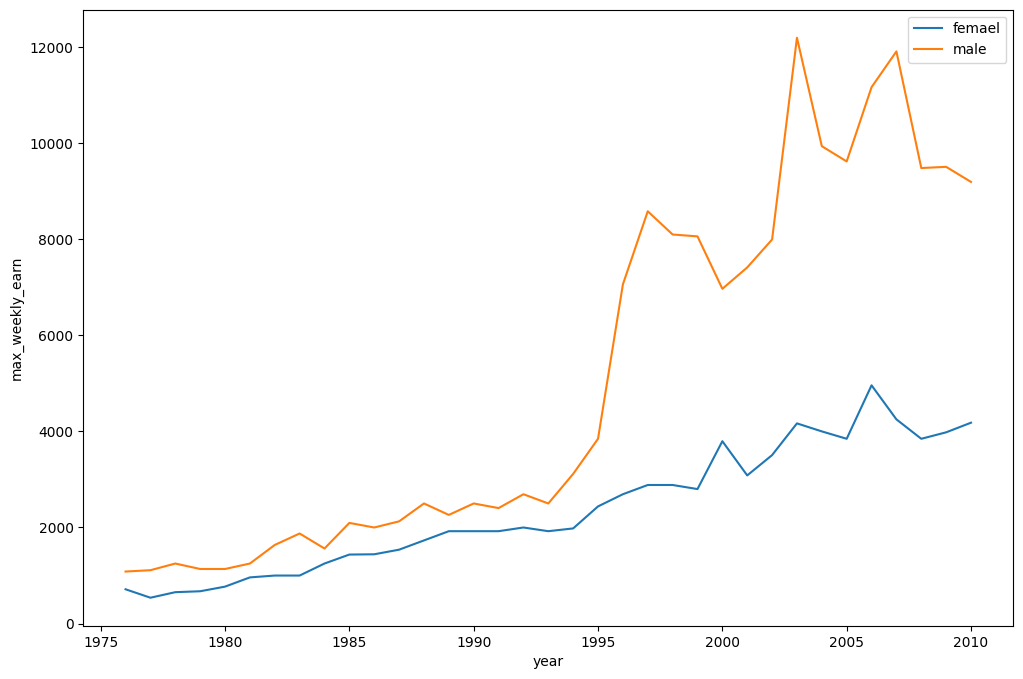

In [104]:
plt.figure(figsize=(12,8))
sns.lineplot(data=max_female_data.loc[(max_female_data['female']==1)],
             x=max_female_data.loc[(max_female_data['female']==1)]['year'],
             y='max_weekly_earn',
             label='femael')
sns.lineplot(data=max_female_data.loc[(max_female_data['female']==0)],
             x=max_female_data.loc[(max_female_data['female']==0)]['year'],
             y='max_weekly_earn',
             label='male')
plt.legend()
plt.show()

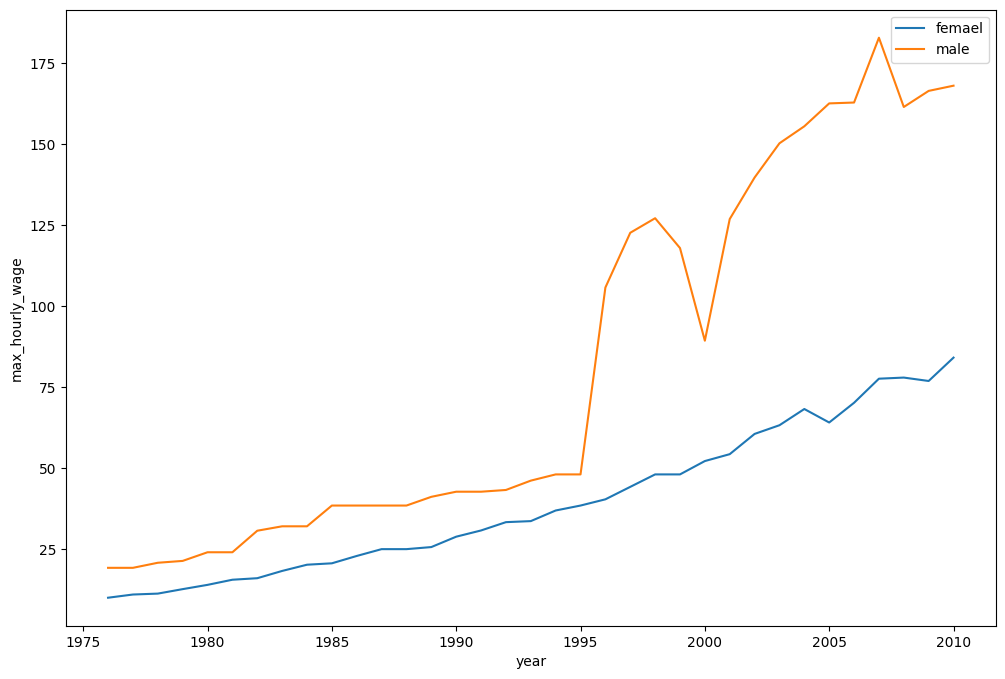

In [105]:
plt.figure(figsize=(12,8))
sns.lineplot(data=max_female_data.loc[(max_female_data['female']==1)],
             x=max_female_data.loc[(max_female_data['female']==1)]['year'],
             y='max_hourly_wage',
             label='femael')
sns.lineplot(data=max_female_data.loc[(max_female_data['female']==0)],
             x=max_female_data.loc[(max_female_data['female']==0)]['year'],
             y='max_hourly_wage',
             label='male')
plt.legend()
plt.show()

### 연도별 남녀에 따른 상위 10% 임금

In [106]:
plt.figure(figsize=(12,8))
high10_female_data = data.groupby(['year', 'female'])\
                .quantile(0.90)[['weekly_earn', 'hourly_wage']]\
                .reset_index()

high10_female_data.columns = ['year', 'female', 'high10_weekly_earn', 'high10_hourly_wage']
high10_female_data.head()

,year,female,high10_weekly_earn,high10_hourly_wage
0,1976,0,442.307678,10.203940
1,1976,1,250.000000,6.105769
2,1977,0,480.769226,10.897435
3,1977,1,268.619995,6.578948
4,1978,0,503.492297,11.538462


<Figure size 1200x800 with 0 Axes>

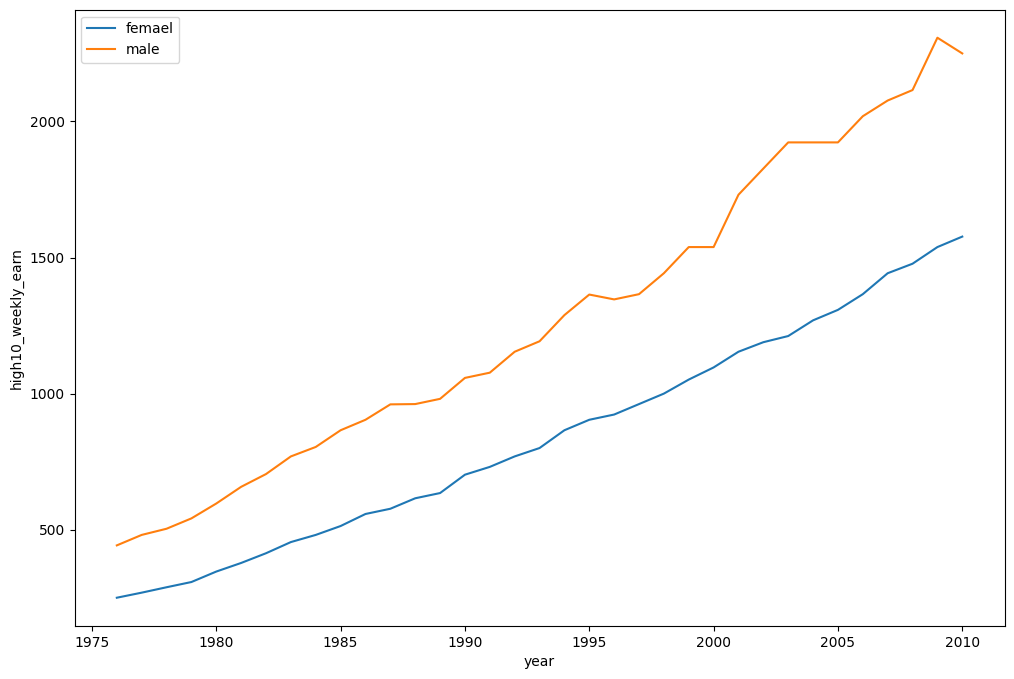

In [107]:
plt.figure(figsize=(12,8))
sns.lineplot(data=high10_female_data.loc[(high10_female_data['female']==1)],
             x=high10_female_data.loc[(high10_female_data['female']==1)]['year'],
             y='high10_weekly_earn',
             label='femael')
sns.lineplot(data=high10_female_data.loc[(high10_female_data['female']==0)],
             x=high10_female_data.loc[(high10_female_data['female']==0)]['year'],
             y='high10_weekly_earn',
             label='male')
plt.legend()
plt.show()

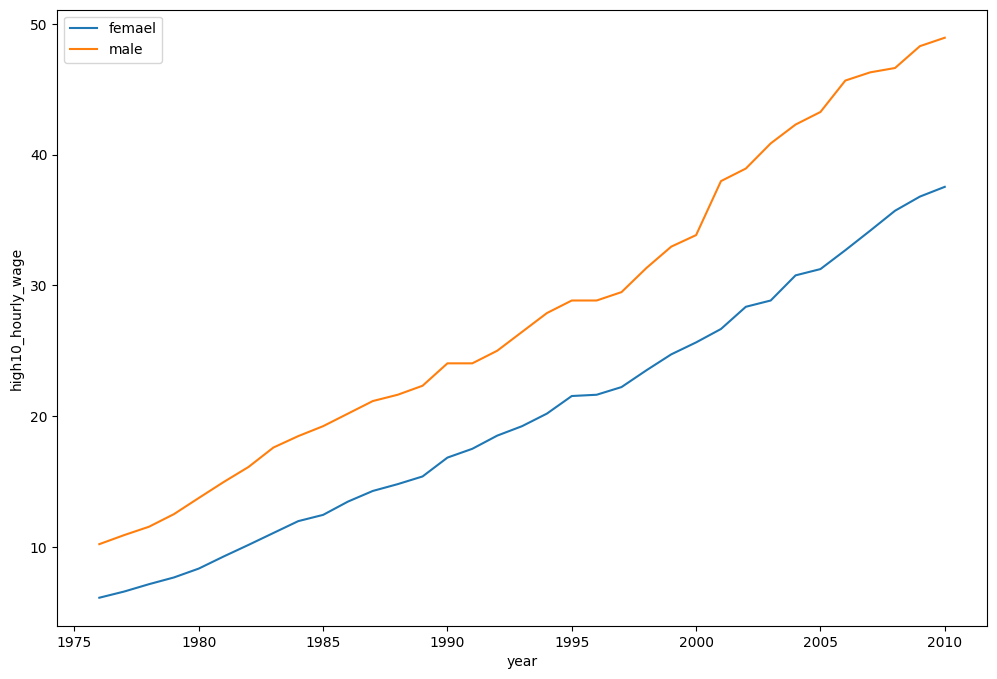

In [108]:
plt.figure(figsize=(12,8))
sns.lineplot(data=high10_female_data.loc[(high10_female_data['female']==1)],
             x=high10_female_data.loc[(high10_female_data['female']==1)]['year'],
             y='high10_hourly_wage',
             label='femael')
sns.lineplot(data=high10_female_data.loc[(high10_female_data['female']==0)],
             x=high10_female_data.loc[(high10_female_data['female']==0)]['year'],
             y='high10_hourly_wage',
             label='male')
plt.legend()
plt.show()

### 연도별 남녀에 따른 최저 임금

In [70]:
plt.figure(figsize=(12,8))
min_female_data = data.groupby(['year', 'female'])\
                .min()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

min_female_data.columns = ['year', 'female', 'min_weekly_earn', 'min_hourly_wage']
min_female_data.head()

,year,female,min_weekly_earn,min_hourly_wage
0,1976,0,61.224491,1.978022
1,1976,1,42.461540,1.415385
2,1977,0,57.692307,1.846154
3,1977,1,43.375000,1.442308
4,1978,0,65.384613,2.000000


<Figure size 1200x800 with 0 Axes>

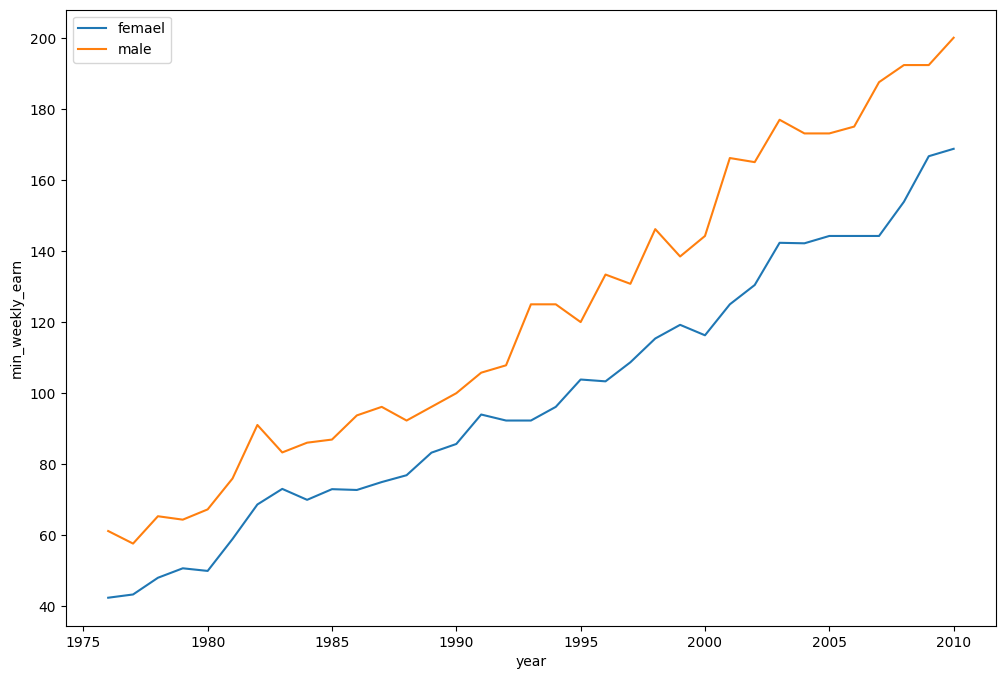

In [71]:
plt.figure(figsize=(12,8))
sns.lineplot(data=min_female_data.loc[(min_female_data['female']==1)],
             x=min_female_data.loc[(min_female_data['female']==1)]['year'],
             y='min_weekly_earn',
             label='femael')
sns.lineplot(data=min_female_data.loc[(min_female_data['female']==0)],
             x=min_female_data.loc[(min_female_data['female']==0)]['year'],
             y='min_weekly_earn',
             label='male')
plt.legend()
plt.show()

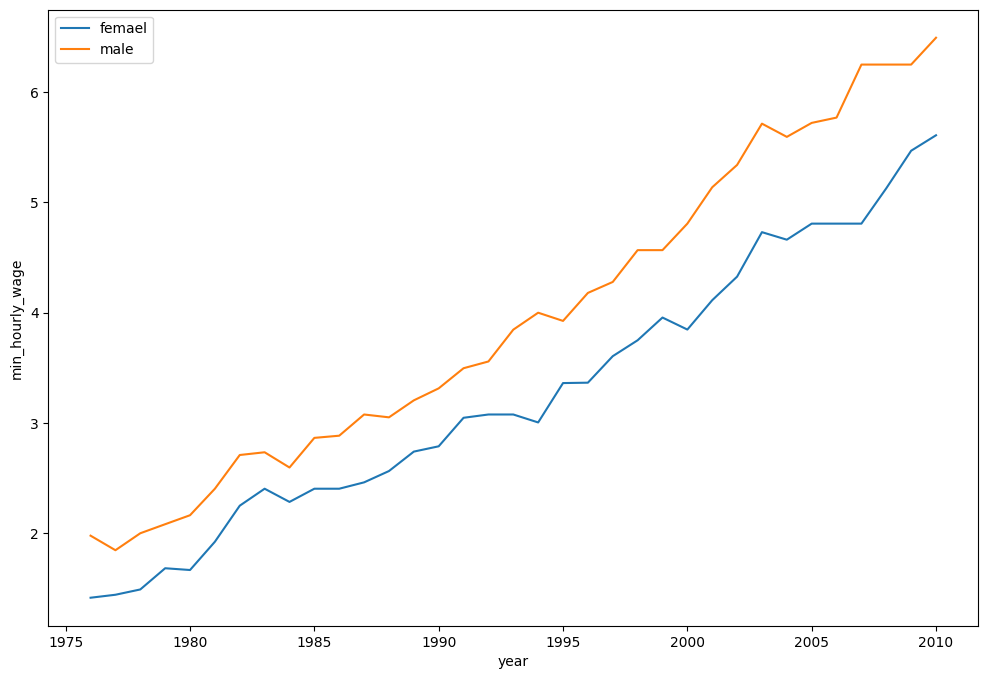

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(data=min_female_data.loc[(min_female_data['female']==1)],
             x=min_female_data.loc[(min_female_data['female']==1)]['year'],
             y='min_hourly_wage',
             label='femael')
sns.lineplot(data=min_female_data.loc[(min_female_data['female']==0)],
             x=min_female_data.loc[(min_female_data['female']==0)]['year'],
             y='min_hourly_wage',
             label='male')
plt.legend()
plt.show()

### 연도별 남녀에 따른 하위 10% 임금

In [109]:
plt.figure(figsize=(12,8))
low10_female_data = data.groupby(['year', 'female'])\
                .quantile(0.10)[['weekly_earn', 'hourly_wage']]\
                .reset_index()

low10_female_data.columns = ['year', 'female', 'low10_weekly_earn', 'low10_hourly_wage']
low10_female_data.head()

,year,female,low10_weekly_earn,low10_hourly_wage
0,1976,0,153.846161,3.489327
1,1976,1,86.538460,2.250000
2,1977,0,155.769226,3.511010
3,1977,1,95.238098,2.403846
4,1978,0,164.612817,3.750000


<Figure size 1200x800 with 0 Axes>

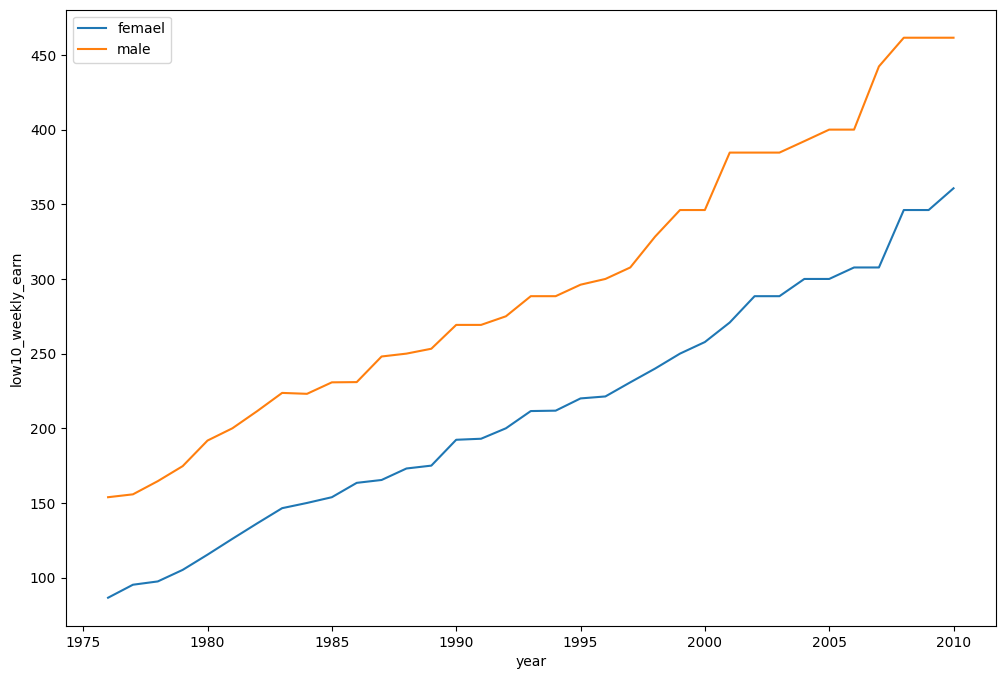

In [110]:
plt.figure(figsize=(12,8))
sns.lineplot(data=low10_female_data.loc[(low10_female_data['female']==1)],
             x=low10_female_data.loc[(low10_female_data['female']==1)]['year'],
             y='low10_weekly_earn',
             label='femael')
sns.lineplot(data=low10_female_data.loc[(low10_female_data['female']==0)],
             x=low10_female_data.loc[(low10_female_data['female']==0)]['year'],
             y='low10_weekly_earn',
             label='male')
plt.legend()
plt.show()

### 연도별 남녀에 따른 임금 표준편차

In [74]:
std_female_data = data.groupby(['year', 'female'])\
                .std()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

std_female_data.columns = ['year', 'female', 'std_weekly_earn', 'std_hourly_wage']
std_female_data.head()

,year,female,std_weekly_earn,std_hourly_wage
0,1976,0,132.525062,2.836793
1,1976,1,64.308649,1.542381
2,1977,0,140.265556,3.038849
3,1977,1,69.545920,1.680764
4,1978,0,151.097827,3.291275


<Figure size 1200x800 with 0 Axes>

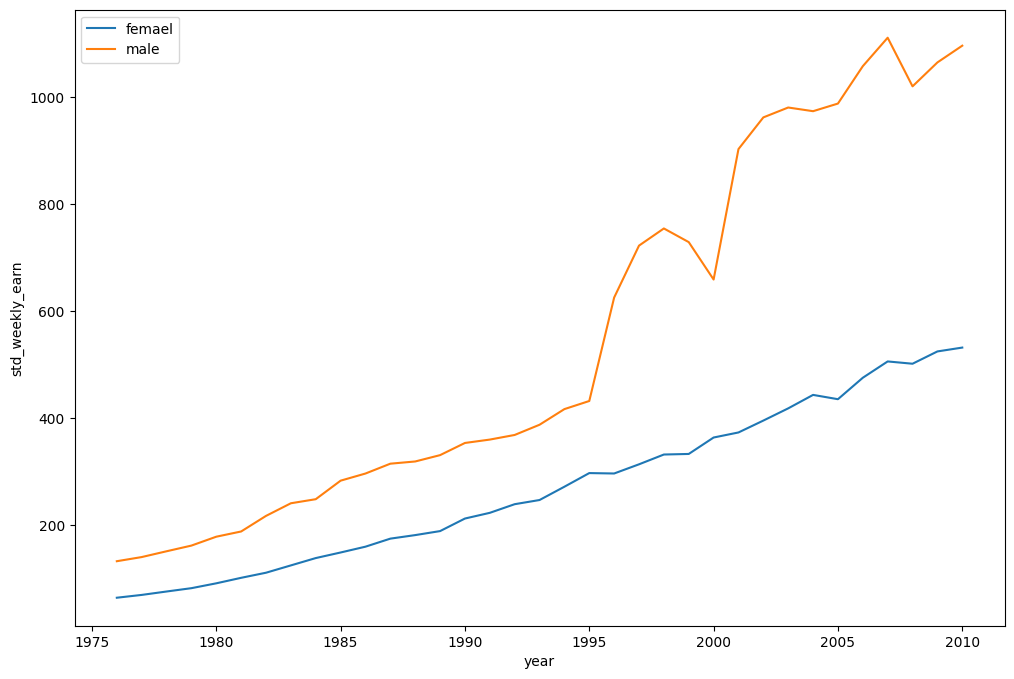

In [75]:
plt.figure(figsize=(12,8))
sns.lineplot(data=std_female_data.loc[(std_female_data['female']==1)],
             x=std_female_data.loc[(std_female_data['female']==1)]['year'],
             y='std_weekly_earn',
             label='femael')
sns.lineplot(data=std_female_data.loc[(std_female_data['female']==0)],
             x=std_female_data.loc[(std_female_data['female']==0)]['year'],
             y='std_weekly_earn',
             label='male')
plt.legend()
plt.show()

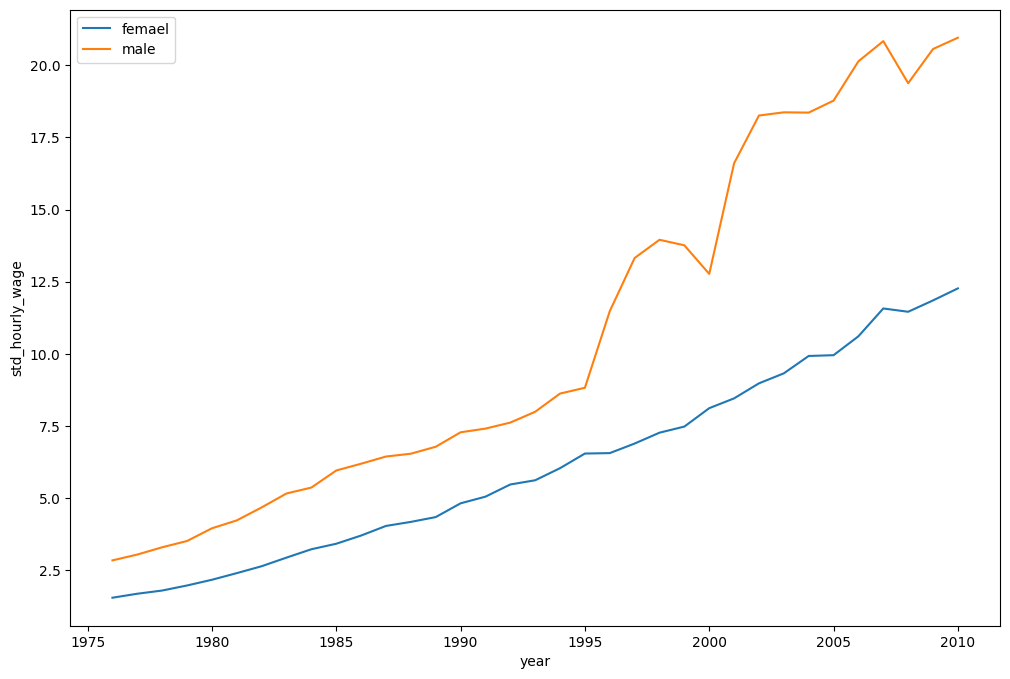

In [76]:
plt.figure(figsize=(12,8))
sns.lineplot(data=std_female_data.loc[(std_female_data['female']==1)],
             x=std_female_data.loc[(std_female_data['female']==1)]['year'],
             y='std_hourly_wage',
             label='femael')
sns.lineplot(data=std_female_data.loc[(std_female_data['female']==0)],
             x=std_female_data.loc[(std_female_data['female']==0)]['year'],
             y='std_hourly_wage',
             label='male')
plt.legend()
plt.show()

## Veteran

### 모든 데이터

<Axes: xlabel='veteran', ylabel='weekly_earn'>

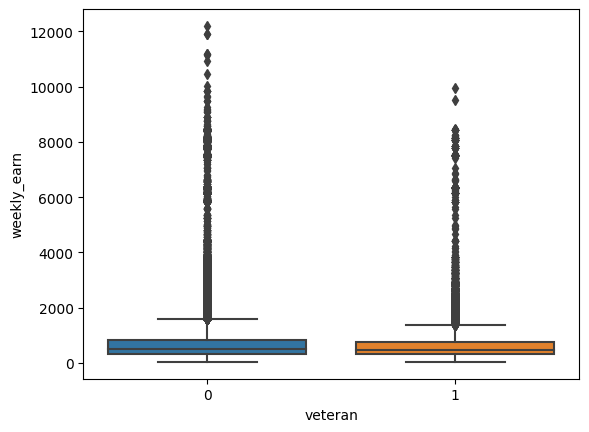

In [48]:
sns.boxplot(data=data, 
            x='veteran',
            y='weekly_earn')

<Axes: xlabel='veteran', ylabel='hourly_wage'>

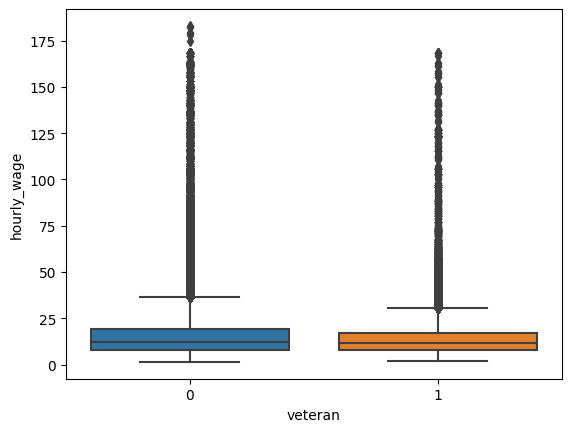

In [49]:
sns.boxplot(data=data, 
            x='veteran',
            y='hourly_wage')

### 연도별 참전 군인 여부에 따른 평균 임금

In [50]:
mean_veteran_data = data.groupby(['year', 'veteran'])\
                .mean()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

mean_veteran_data.columns = ['year', 'veteran', 'mean_weekly_earn', 'mean_hourly_wage']
mean_veteran_data.head()

,year,veteran,mean_weekly_earn,mean_hourly_wage
0,1976,0,214.880394,5.103885
1,1976,1,297.602973,6.816454
2,1977,0,229.314433,5.410319
3,1977,1,316.311593,7.205717
4,1978,0,247.503731,5.817981


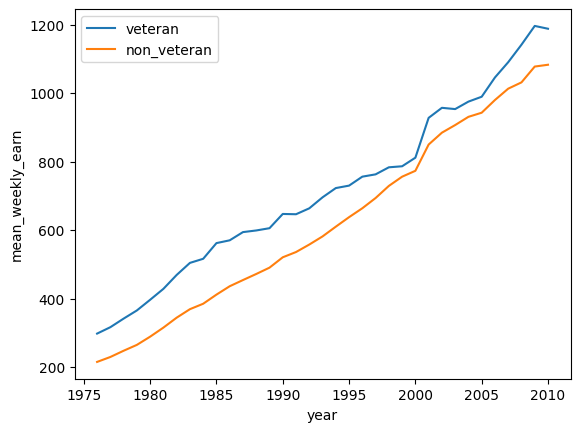

In [53]:
sns.lineplot(data=mean_veteran_data.loc[(mean_veteran_data['veteran']==1)],
             x=mean_veteran_data.loc[(mean_veteran_data['veteran']==1)]['year'],
             y='mean_weekly_earn',
             label='veteran')
sns.lineplot(data=mean_veteran_data.loc[(mean_veteran_data['veteran']==0)],
             x=mean_veteran_data.loc[(mean_veteran_data['veteran']==0)]['year'],
             y='mean_weekly_earn',
             label='non_veteran')
plt.legend()
plt.show()

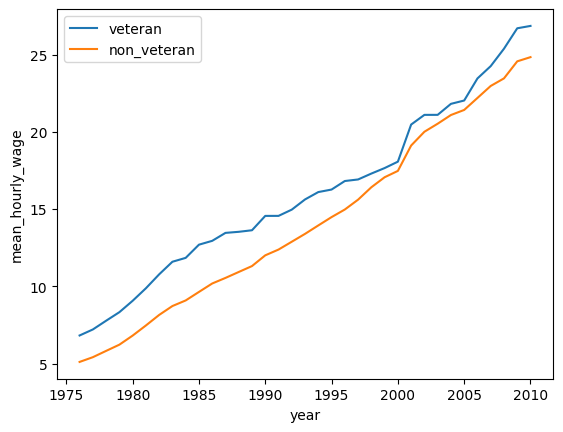

In [52]:
sns.lineplot(data=mean_veteran_data.loc[(mean_veteran_data['veteran']==1)],
             x=mean_veteran_data.loc[(mean_veteran_data['veteran']==1)]['year'],
             y='mean_hourly_wage',
             label='veteran')
sns.lineplot(data=mean_veteran_data.loc[(mean_veteran_data['veteran']==0)],
             x=mean_veteran_data.loc[(mean_veteran_data['veteran']==0)]['year'],
             y='mean_hourly_wage',
             label='non_veteran')
plt.legend()
plt.show()

### 연도별 참전 군인 여부에 따른 최고 임금

In [77]:
max_veteran_data = data.groupby(['year', 'veteran'])\
                .max()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

max_veteran_data.columns = ['year', 'veteran', 'max_weekly_earn', 'max_hourly_wage']
max_veteran_data.head()

,year,veteran,max_weekly_earn,max_hourly_wage
0,1976,0,1083.386353,19.230768
1,1976,1,961.538452,19.230768
2,1977,0,961.538452,19.230770
3,1977,1,1111.111084,19.230770
4,1978,0,1250.000000,20.796154


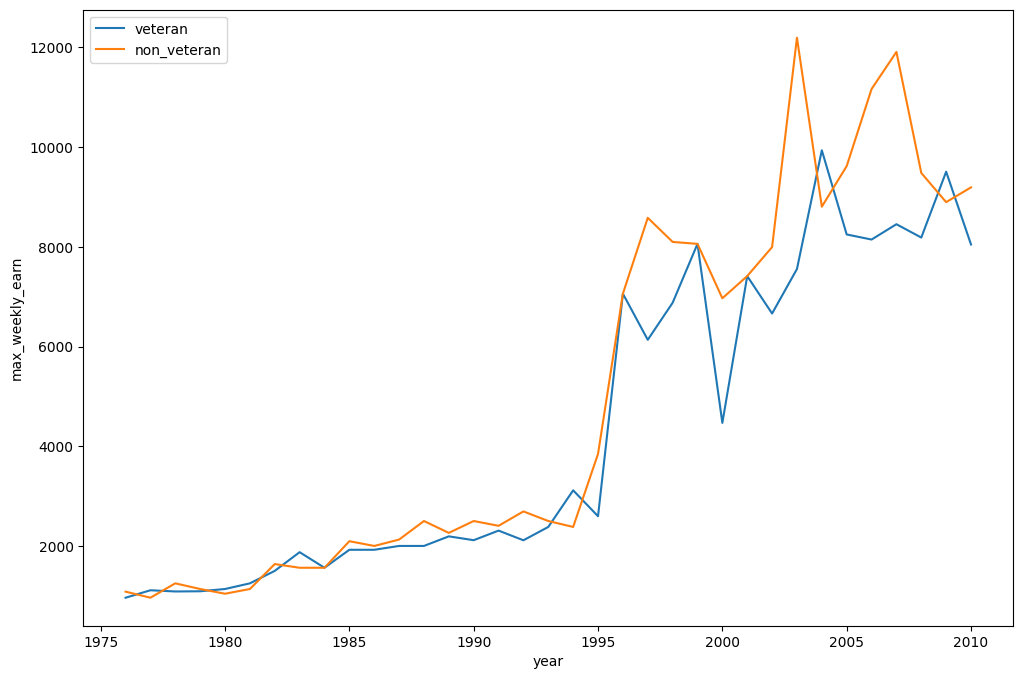

In [78]:
plt.figure(figsize=(12,8))
sns.lineplot(data=max_veteran_data.loc[(max_veteran_data['veteran']==1)],
             x=max_veteran_data.loc[(max_veteran_data['veteran']==1)]['year'],
             y='max_weekly_earn',
             label='veteran')
sns.lineplot(data=max_veteran_data.loc[(max_veteran_data['veteran']==0)],
             x=max_veteran_data.loc[(max_veteran_data['veteran']==0)]['year'],
             y='max_weekly_earn',
             label='non_veteran')
plt.legend()
plt.show()

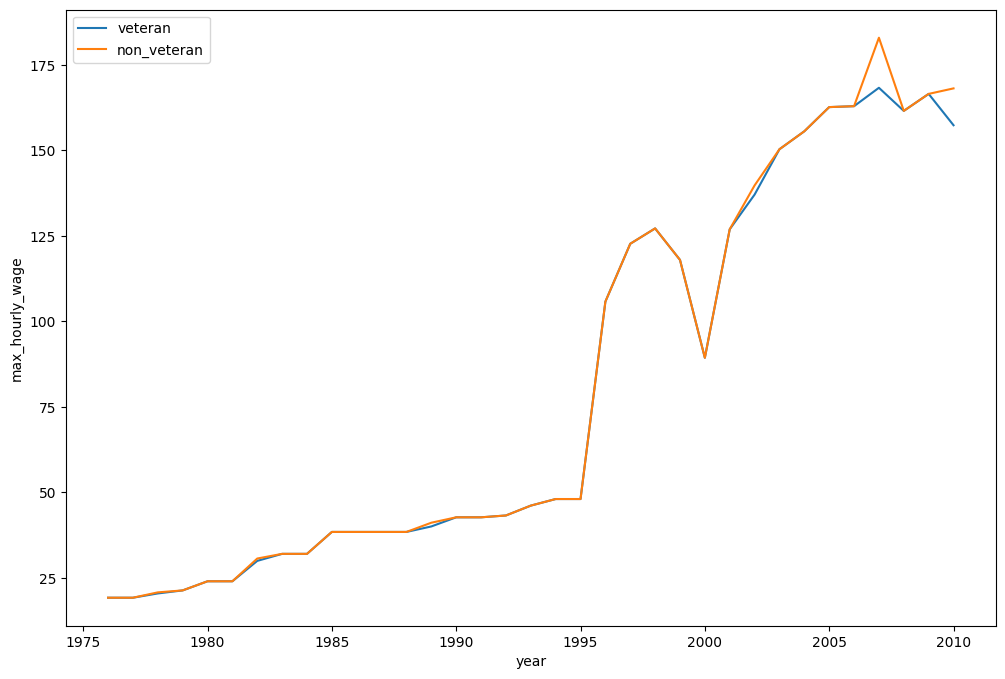

In [79]:
plt.figure(figsize=(12,8))
sns.lineplot(data=max_veteran_data.loc[(max_veteran_data['veteran']==1)],
             x=max_veteran_data.loc[(max_veteran_data['veteran']==1)]['year'],
             y='max_hourly_wage',
             label='veteran')
sns.lineplot(data=max_veteran_data.loc[(max_veteran_data['veteran']==0)],
             x=max_veteran_data.loc[(max_veteran_data['veteran']==0)]['year'],
             y='max_hourly_wage',
             label='non_veteran')
plt.legend()
plt.show()

### 연도별 참전 군인 여부에 따른 상위 10% 임금

In [112]:
high10_veteran_data = data.groupby(['year', 'veteran'])\
                .quantile(0.90)[['weekly_earn', 'hourly_wage']]\
                .reset_index()

high10_veteran_data.columns = ['year', 'veteran', 'high10_weekly_earn', 'high10_hourly_wage']
high10_veteran_data.head()

,year,veteran,high10_weekly_earn,high10_hourly_wage
0,1976,0,346.806528,8.241758
1,1976,1,461.538452,10.576923
2,1977,0,382.269226,8.791209
3,1977,1,480.769226,11.387211
4,1978,0,404.272504,9.615384


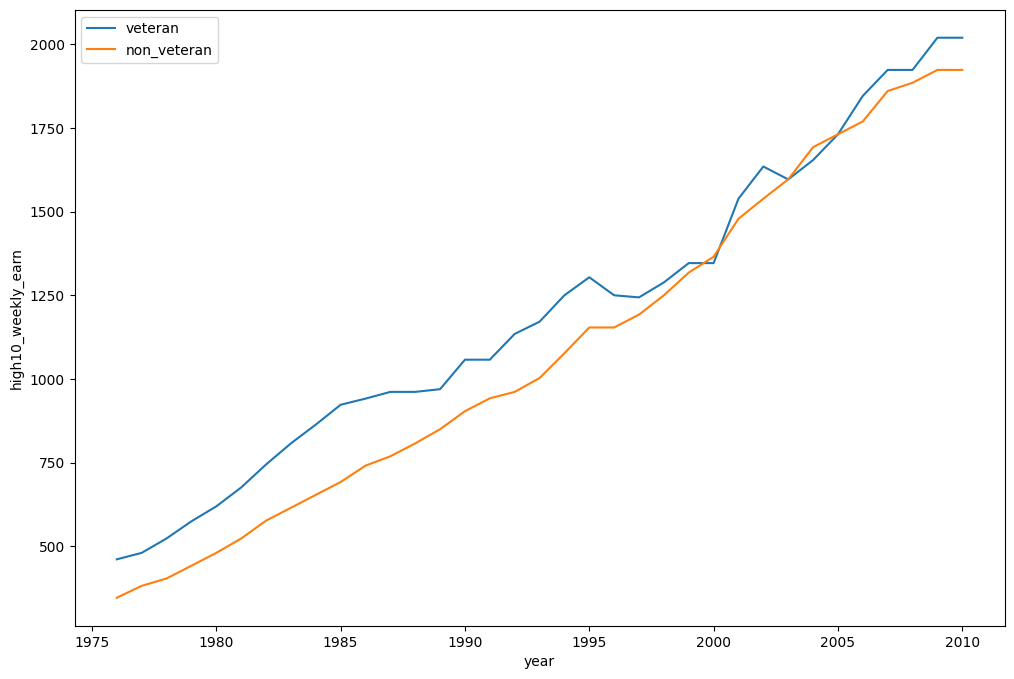

In [113]:
plt.figure(figsize=(12,8))
sns.lineplot(data=high10_veteran_data.loc[(high10_veteran_data['veteran']==1)],
             x=high10_veteran_data.loc[(high10_veteran_data['veteran']==1)]['year'],
             y='high10_weekly_earn',
             label='veteran')
sns.lineplot(data=high10_veteran_data.loc[(high10_veteran_data['veteran']==0)],
             x=high10_veteran_data.loc[(high10_veteran_data['veteran']==0)]['year'],
             y='high10_weekly_earn',
             label='non_veteran')
plt.legend()
plt.show()

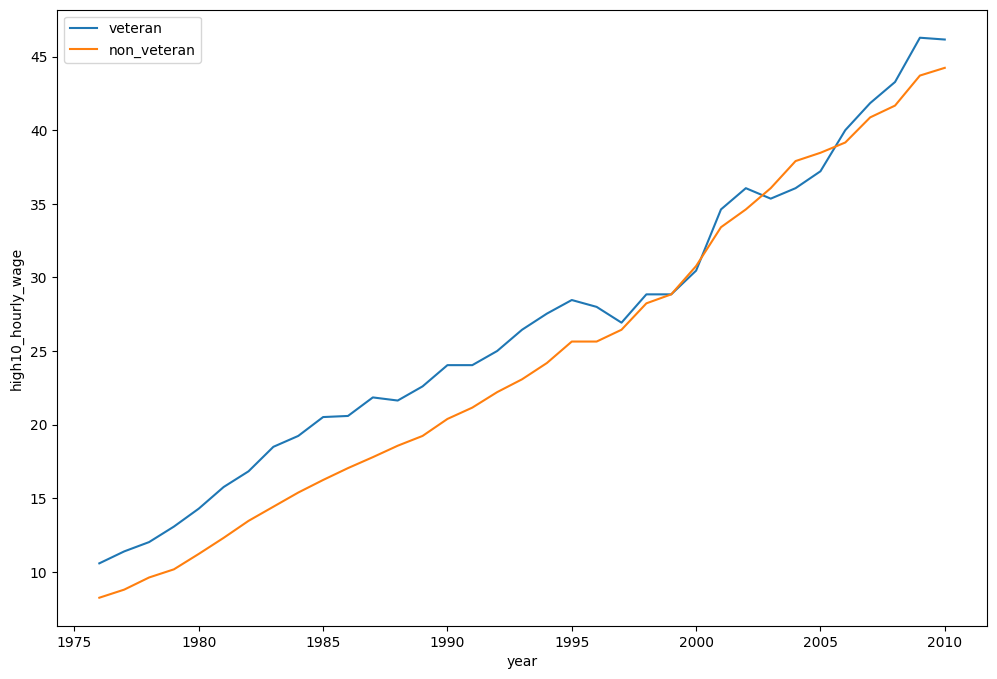

In [114]:
plt.figure(figsize=(12,8))
sns.lineplot(data=high10_veteran_data.loc[(high10_veteran_data['veteran']==1)],
             x=high10_veteran_data.loc[(high10_veteran_data['veteran']==1)]['year'],
             y='high10_hourly_wage',
             label='veteran')
sns.lineplot(data=high10_veteran_data.loc[(high10_veteran_data['veteran']==0)],
             x=high10_veteran_data.loc[(high10_veteran_data['veteran']==0)]['year'],
             y='high10_hourly_wage',
             label='non_veteran')
plt.legend()
plt.show()

### 연도별 참전 군인 여부에 따른 최저 임금

In [80]:
min_veteran_data = data.groupby(['year', 'veteran'])\
                .min()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

min_veteran_data.columns = ['year', 'veteran', 'min_weekly_earn', 'min_hourly_wage']
min_veteran_data.head()

,year,veteran,min_weekly_earn,min_hourly_wage
0,1976,0,42.461540,1.415385
1,1976,1,75.000000,1.978022
2,1977,0,43.375000,1.442308
3,1977,1,57.692307,1.846154
4,1978,0,48.076923,1.490385


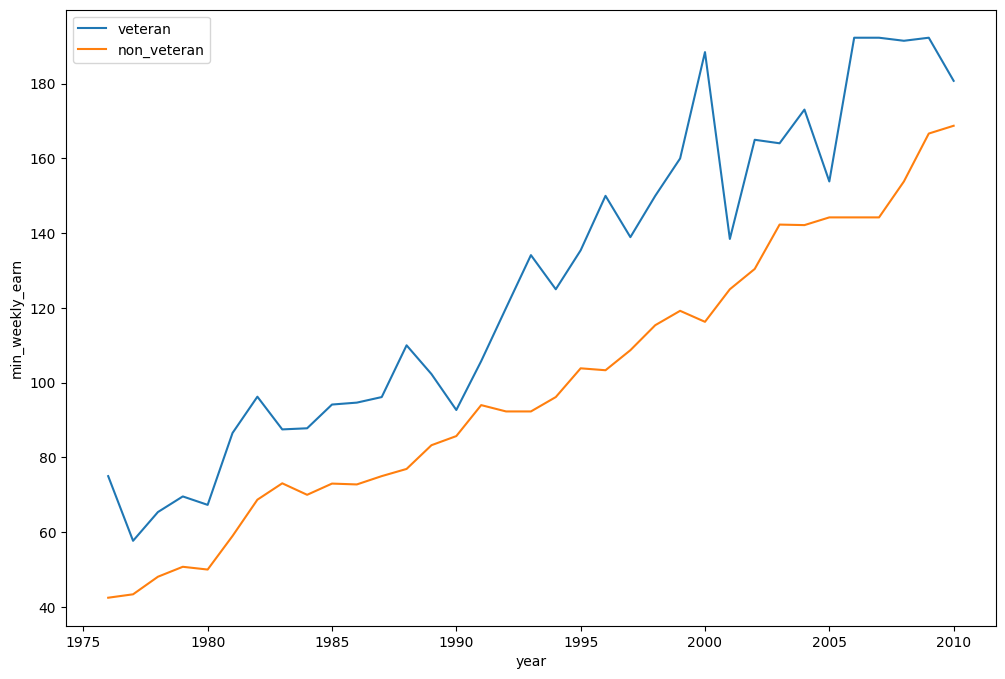

In [81]:
plt.figure(figsize=(12,8))
sns.lineplot(data=min_veteran_data.loc[(min_veteran_data['veteran']==1)],
             x=min_veteran_data.loc[(min_veteran_data['veteran']==1)]['year'],
             y='min_weekly_earn',
             label='veteran')
sns.lineplot(data=min_veteran_data.loc[(min_veteran_data['veteran']==0)],
             x=min_veteran_data.loc[(min_veteran_data['veteran']==0)]['year'],
             y='min_weekly_earn',
             label='non_veteran')
plt.legend()
plt.show()

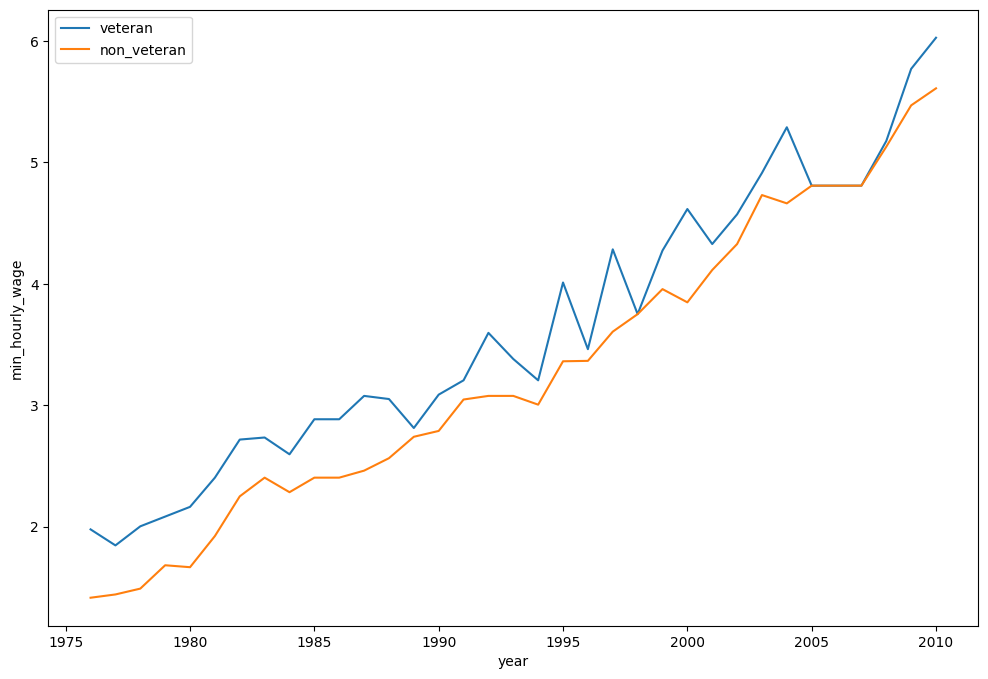

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(data=min_veteran_data.loc[(min_veteran_data['veteran']==1)],
             x=min_veteran_data.loc[(min_veteran_data['veteran']==1)]['year'],
             y='min_hourly_wage',
             label='veteran')
sns.lineplot(data=min_veteran_data.loc[(min_veteran_data['veteran']==0)],
             x=min_veteran_data.loc[(min_veteran_data['veteran']==0)]['year'],
             y='min_hourly_wage',
             label='non_veteran')
plt.legend()
plt.show()

### 연도별 참전 군인 여부에 따른 하위 10% 임금

In [115]:
low10_veteran_data = data.groupby(['year', 'veteran'])\
                .quantile(0.10)[['weekly_earn', 'hourly_wage']]\
                .reset_index()

low10_veteran_data.columns = ['year', 'veteran', 'low10_weekly_earn', 'low10_hourly_wage']
low10_veteran_data.head()

,year,veteran,low10_weekly_earn,low10_hourly_wage
0,1976,0,100.000000,2.500000
1,1976,1,163.461533,3.720677
2,1977,0,106.165385,2.654904
3,1977,1,170.315875,3.750000
4,1978,0,115.384613,2.858918


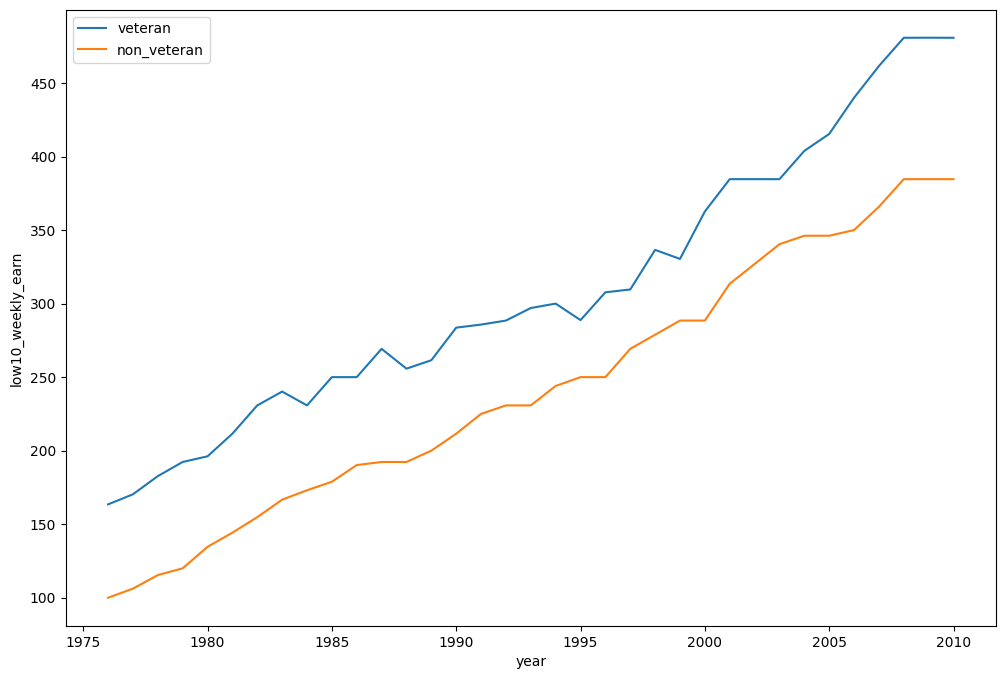

In [116]:
plt.figure(figsize=(12,8))
sns.lineplot(data=low10_veteran_data.loc[(low10_veteran_data['veteran']==1)],
             x=low10_veteran_data.loc[(low10_veteran_data['veteran']==1)]['year'],
             y='low10_weekly_earn',
             label='veteran')
sns.lineplot(data=low10_veteran_data.loc[(low10_veteran_data['veteran']==0)],
             x=low10_veteran_data.loc[(low10_veteran_data['veteran']==0)]['year'],
             y='low10_weekly_earn',
             label='non_veteran')
plt.legend()
plt.show()

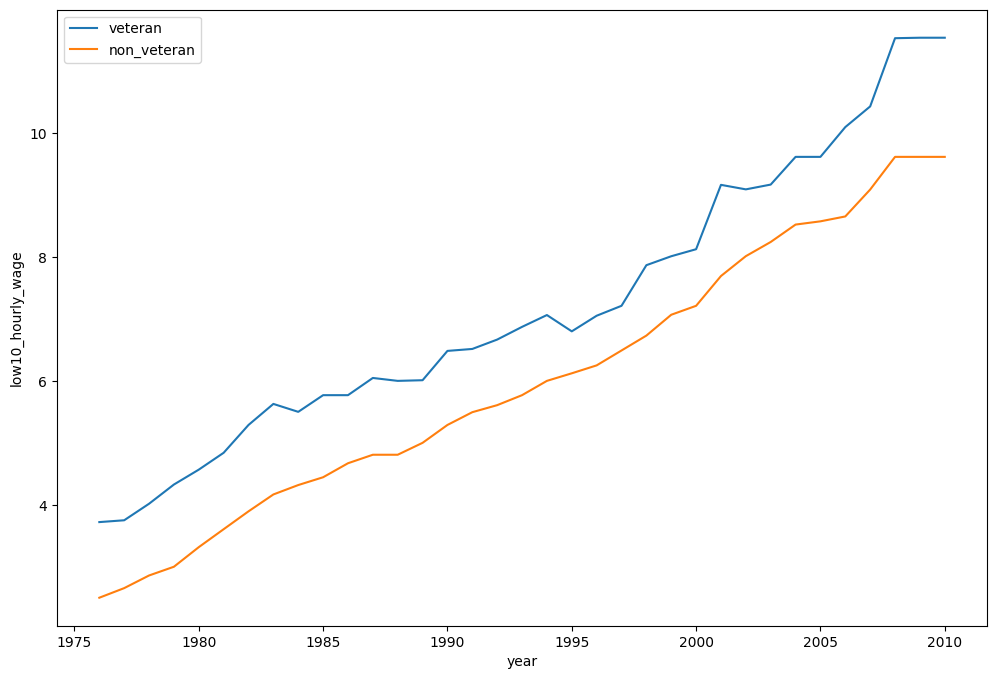

In [117]:
plt.figure(figsize=(12,8))
sns.lineplot(data=low10_veteran_data.loc[(low10_veteran_data['veteran']==1)],
             x=low10_veteran_data.loc[(low10_veteran_data['veteran']==1)]['year'],
             y='low10_hourly_wage',
             label='veteran')
sns.lineplot(data=low10_veteran_data.loc[(low10_veteran_data['veteran']==0)],
             x=low10_veteran_data.loc[(low10_veteran_data['veteran']==0)]['year'],
             y='low10_hourly_wage',
             label='non_veteran')
plt.legend()
plt.show()

### 연도별 참전 군인 여부에 따른 임금 표준편차

In [83]:
std_veteran_data = data.groupby(['year', 'veteran'])\
                .std()[['weekly_earn', 'hourly_wage']]\
                .reset_index()

std_veteran_data.columns = ['year', 'veteran', 'std_weekly_earn', 'std_hourly_wage']
std_veteran_data.head()

,year,veteran,std_weekly_earn,std_hourly_wage
0,1976,0,114.760922,2.476742
1,1976,1,135.613452,2.886880
2,1977,0,121.621180,2.646731
3,1977,1,144.003707,3.088991
4,1978,0,133.146859,2.869983


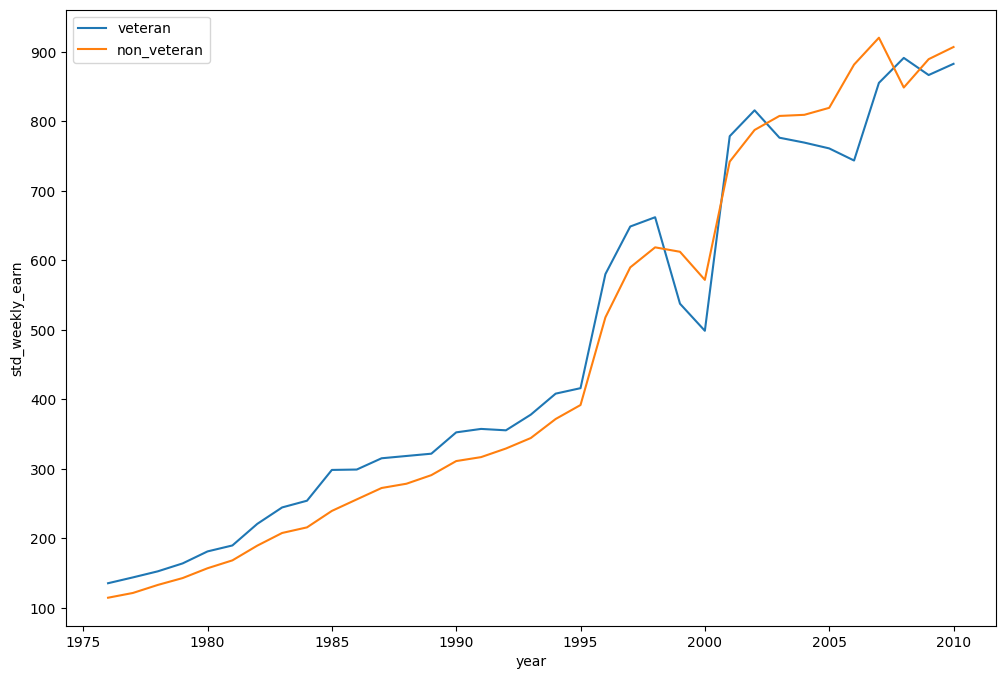

In [85]:
plt.figure(figsize=(12,8))
sns.lineplot(data=std_veteran_data.loc[(std_veteran_data['veteran']==1)],
             x=std_veteran_data.loc[(std_veteran_data['veteran']==1)]['year'],
             y='std_weekly_earn',
             label='veteran')
sns.lineplot(data=std_veteran_data.loc[(std_veteran_data['veteran']==0)],
             x=std_veteran_data.loc[(std_veteran_data['veteran']==0)]['year'],
             y='std_weekly_earn',
             label='non_veteran')
plt.legend()
plt.show()

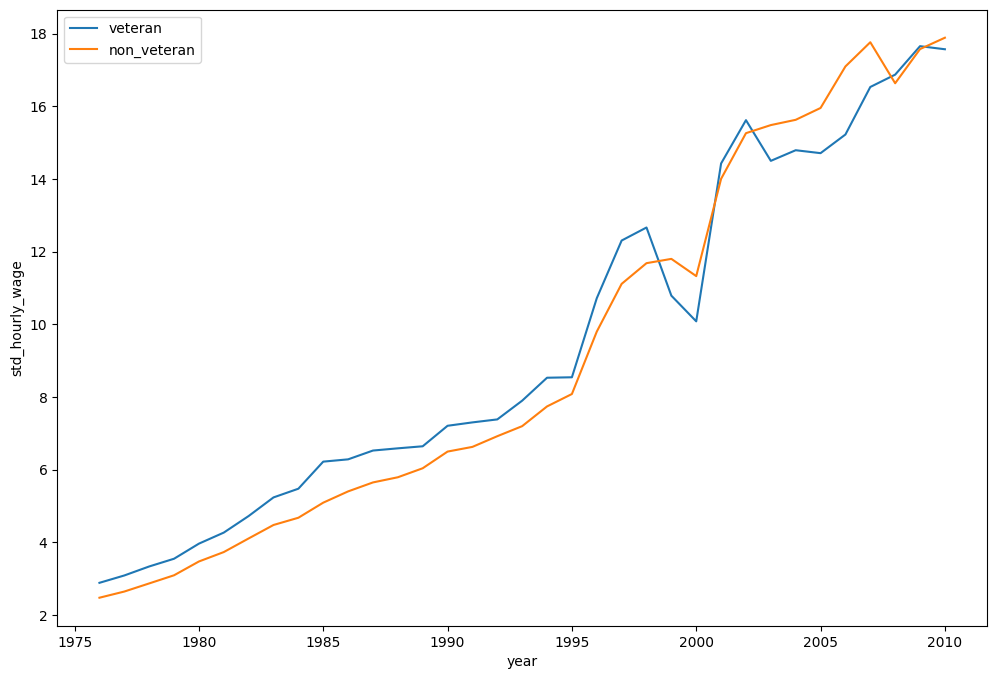

In [86]:
plt.figure(figsize=(12,8))
sns.lineplot(data=std_veteran_data.loc[(std_veteran_data['veteran']==1)],
             x=std_veteran_data.loc[(std_veteran_data['veteran']==1)]['year'],
             y='std_hourly_wage',
             label='veteran')
sns.lineplot(data=std_veteran_data.loc[(std_veteran_data['veteran']==0)],
             x=std_veteran_data.loc[(std_veteran_data['veteran']==0)]['year'],
             y='std_hourly_wage',
             label='non_veteran')
plt.legend()
plt.show()